<a href="https://colab.research.google.com/github/hida0/ESAA-2022-2/blob/HW/Week14_HW2_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 교재 필사
(파이썬 딥러닝 텐서플로 ch4. 1-3 pg.142-181)

## 1. 합성곱 신경망
- **합성곱 신경망(CNN)**은 **데이터가 가진 특징들의 패턴을 학습하는 알고리즘**으로, 대표적으로 **이미지 분류, 객체 탐지, 스타일 전이** 등이 있다.
- 이미지 분류는 그림으로 모델을 학습시키면 모델은 이미지의 특징을 추출하여 이미지를 인식할 수 있는 능력을 갖추게 된다.
- 객체 탐지는 이미지에서 특정한 객체를 인식하고 이미지의 어디에 있는지 위치까지 파악하는 기술이다. 인식한 객체가 어떤 클래스에 속하는지 분류 확률과 예측을 함께 알려준다. 
- 스타일 전이는 콘텐츠 이미지와 스타일 참조 이미지를 이용하여 콘텐츠의 기본 형태를 유지하고 스타일을 입혀서 새로운 이미지를 생성하는 기술이다.

### 1-1. 이미지 표현
- 이미지를 컴퓨터가 이해할 수 있게 하려면 숫자로 표현해야 한다.
- 손글씨 이미지는 0부터 255까지의 숫자로 각 픽셀의 화소 값을 나타내는 방식으로 표현할 수 있다.  0은 완전한 검은색, 255는 완전한 흰색을 나타내며, 그 중간의 숫자들은 회색으로 표현된다. 화소를 나타내는 숫자는 이미지의 강도를 나타내고, 숫자가 클수록 더 강한 특성을 나타낸다.
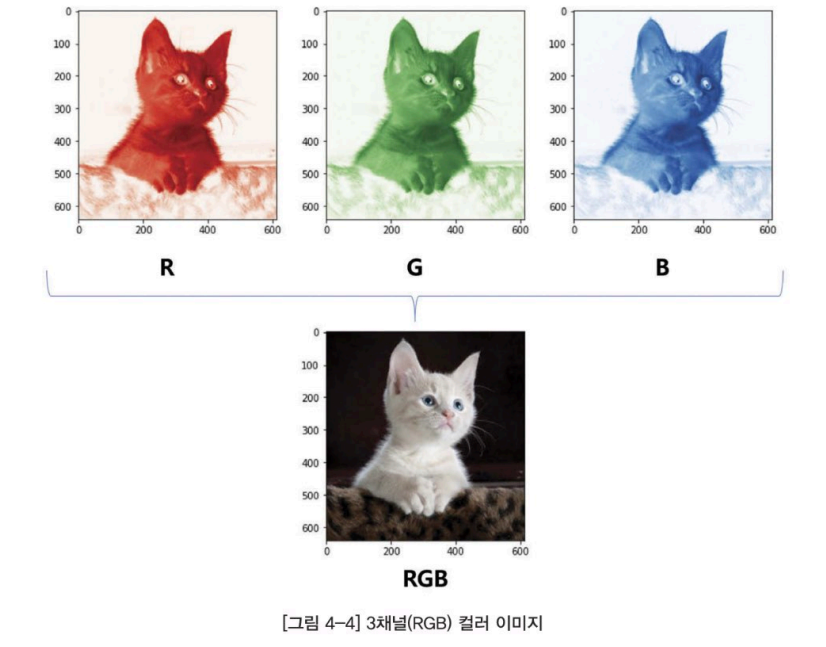
- 컬러 이미지는 R(빨강), G(초록), B(파랑) 채널로 구성된 3장의 이미지를 겹쳐서 표현한다. 각 채널은 마찬가지로 0부터 255까지의 숫자로 나타나며, 숫자가 클수록 해당 색상을 강하게 표현한다.
- 각 채널이 하나의 이미지로 구분되며, 컬러 이미지는 3개의 채널 이미지를 하나로 결합하여 표현한다.

### 1-2. 합성곱(Convolution)
- **합성곱 연산**은 입력 이미지에 대하여 일반적으로 **정방형 크기를 가지는 커널을 사용하여 입력 이미지에 대한 특성을 추출**하는 방법이다. 
- 합성곱 연산을 통해서 추출된 이미지를 **특성맵**이라고 하며, 이렇게 추출된 특성맵을 딥러닝 모델 학습에 사용하면 훨씬 더 좋은 성능을 보인다.
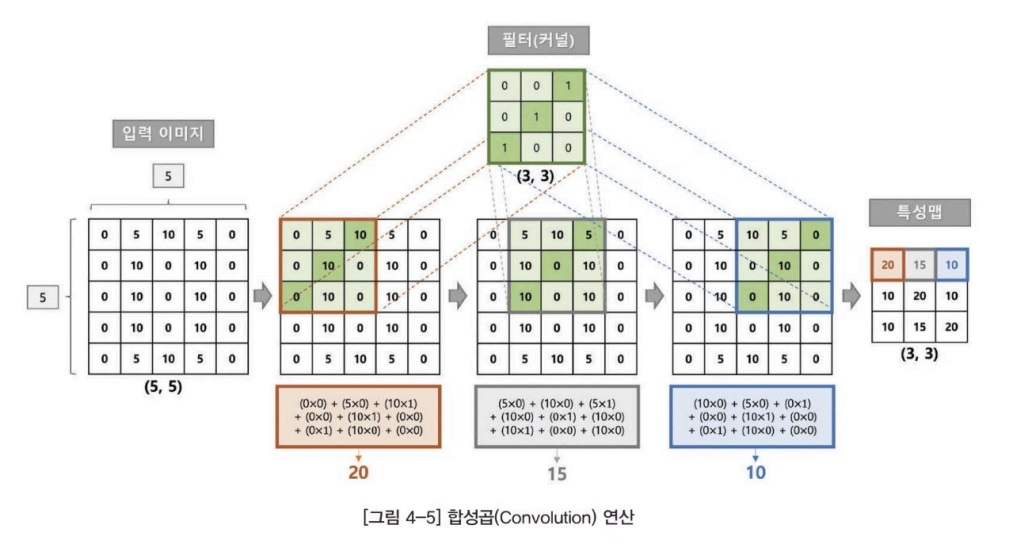
- 다음 그림은 이미지에 필터를 적용하는 합성곱 연산을 설명한다.
- 입력 이미지의 크기는 (세로, 가로) 순서로 shape이 출력된다. 이러한 입력 이미지의 좌측 상단부터 커널과 같은 크기를 갖도록 입력 이미지의 일부분에 커널이 겹치도록 투영된다. 이렇게 입력 이미지와 커널이 겹치는 부분에 대해 합성곱 연산을 수행한다.
- 합성곱 연산은 element-wise 곱셈 연산을 수행 후 모두 더한 값으로 단일 스칼라 값이 나온다. 이렇게 나온 결과는 추출된 이미지인 feature map의 좌측 상단의 첫번째 값이 된다.
- 커널 사이즈에 따라 (가로x세로)개의 가중치를 가지며, 오차 역전파시 커널의 가중치를 업데이트한다. 합성곱 신경망이 이미지 특성 추출에 효율적인 이유는 바로 커널의 공유 가중치 때문이다. 

### 1-3. 채널
- **채널**은 **입력 이미지를 구성하는 2차원 배열의 개수**를 나타낸다.
- 흑백 이미지는 단일 채널로, 즉 채널의 개수가 1개인 이미지이다. 반면 컬러 이미지는 R, G, B 3개의 채널을 가지므로 앞서 세로 5픽셀, 가로 5픽셀인 경우 컬러 이미지의 shape은 (5, 5, 3)이다.
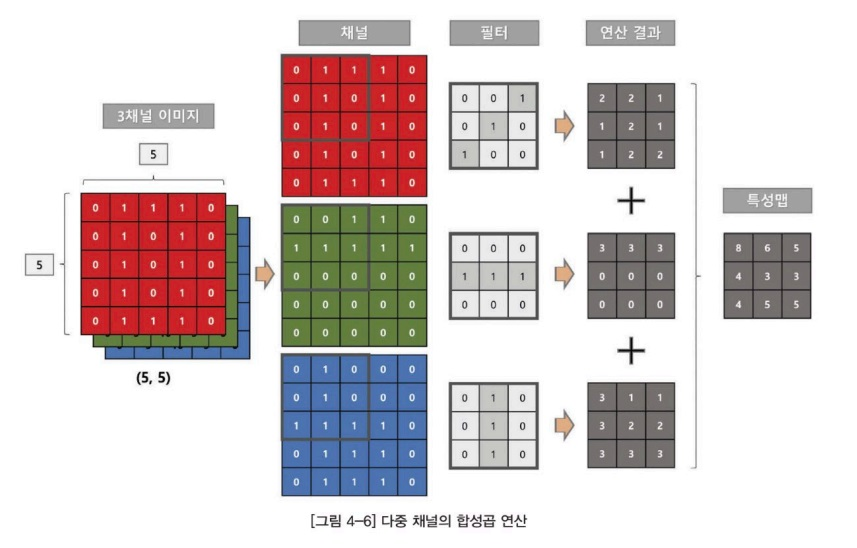
- 입력 이미지가 여러 개의 채널을 갖는 경우 합성곱 연산을 수행할 때 특성맵의 생성 과정을 잘 살펴봐야 한다. 먼저 입력 이미지의 채널 개수만큼 커널이 생성되고, 각 채널마다 하나씩 커널을 적용하여 합성곱 연산을 수행한다. 
- 이 과정으로 입력 이미지의 채널 개수만큼 합성곱 연산된 결과가 생성되고, element-wise 덧셈 연산으로 모두 더해주면 최종 특성맵이 생성된다.

### 1-4. 스트라이드(stride)
- 커널은 좌측 상단으로부터 **입력 이미지를 기준으로 우측으로 이동하면서 합성곱 연산을 계속 수행**하고 특성맵에 결과를 채워나간다. 이때 **이동하는 간격을 스트라이드**라고 정의하며, 주로 **1 또는 2**로 설정한다.
- 스트라이드를 1로 설정하면 커널은 우측으로 1픽셀씩 이동하고, 우측 끝까지 이동하면 아래 방향으로 1칸 좌측 첫번재 픽셀로 이동한다.
- 스트라이드를 2로 설정하면 2픽셀씩 건너뛰므로 특성맵의 크기가 1/2로 줄어든다.

### 1-5. 패딩(padding)
- 입력 이미지에서 특성맵을 추출할 때, **추출된 특성맵의 크기가 입력 이미지 대비 줄어들지 않도록 패딩을 설정**할 수 있다.
- 일반적으로 입력 이미지의 가장 자리에 0으로 채워진 패딩 값으로 채우는 zero-padding을 사용하여 추출하게 된다. 패딩을 적용한 후 합성곱 연산을 수행하면 특성맵의 크기가 줄어들지 않는다.
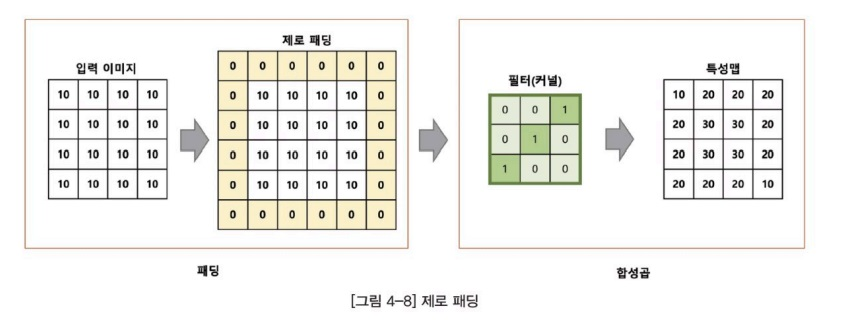
- 텐서플로 케라스의 **`Covn2D`** 레이어에서 **`padding=same`**으로 설정하면 zero-padding을 적용한다. 

### 1-6. 특성맵 사이즈
- 패딩과 스트라이드를 적용하고, 입력 데이터와 필터의 크기가 주어졌을 때 **출력 데이터의 크기**를 구하는 식은 다음과 같다.

(Output Height, Output Width) = $( \frac{Image Height + 2P - Kernel Height}{S}+1, \frac{Image Width + 2P - Kernel Width}{S}+1)$

- Image Height, Image Width : 입력크기 (input size)
- Kernel Height, Kernel Width : 필터 크기 (kernel size)
- S : stride
- P : padding
- Output Height, Output Width : 출력 크기 (output size)

### 1-7. 풀링(pooling)
- **풀링 레이어**는 **추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어**이다. 이미지 축소를 통해 연산량을 감소하고 과대적합을 방지할 수 있다.
- 풀링 레이어는 크게 최대 풀링과 평균 풀링으로 나뉜다. **최대 풀링은 특징의 값이 큰 값이 다른 특징들을 대표한다**는 개념으로 도입되어 좋은 성능을 발휘하므로 합성곱 신경망과 주로 같이 사용된다.
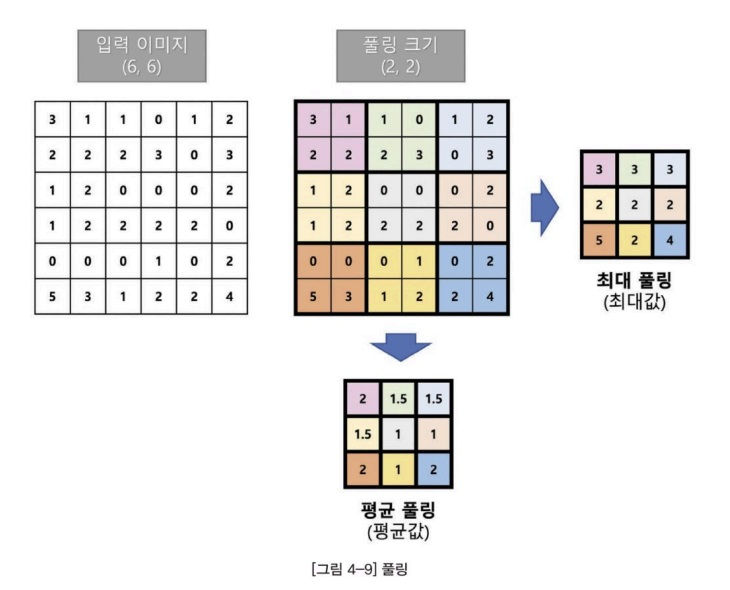
- **최대 풀링** 수행시 커널의 크기가 2x2로 주어질 때 입력 이미지의 2x2 픽셀 중 **최대값이 출력 값으로 선택**된다. **평균 풀링** 수행시에는 2x2 픽셀의 **평균 값이 출력 값으로 선택**된다.

## 2. 간단한 모델 생성
- mnist 손글씨 데이터셋으로 간단한 구조의 합성곱 신경망 모델을 만든다.

### 2-1. 데이터 로드 및 전처리
- 데이터셋을 불러오면 훈련 셋과 검증 셋으로 구분하여 튜플 형태로 정리된다. 훈련 셋은 60000개, 검증 셋은 10000개이다. 
- 가로, 세로 각각 28픽셀인 손글씨 이미지와 손글씨가 나타내는 숫자 레이블이 매칭되어 있다.
- 훈련 셋의 첫번재 이미지를 출력하면 숫자 5에 대한 손글씨 이미지이다.
- 훈련 셋과 검증 셋의 이미지 픽셀을 나타내는 값의 최소값과 최대값을 출력하면 이미지 픽셀이 0~255 범위의 숫자로 구성된 것을 확인할 수 있다.
- 딥러닝 모델의 안정적인 학습을 위해 입력 이미지 픽셀 값을 최대 값인 255로 나누어 0부터 1까지 범위로 스케일을 정규화한다.
- mnist 데이터셋은 색상을 나타내는 채널이 1개이다. CNN 모델에 주입하기 위해 색상을 나타내는 채널을 추가한다. 
- [  ] 안에 채널을 추가하고자 하는 위치에 **`tf.newaxis`** 를 작성하면 축을 텐서 배열이 직접 추가하는 방식으로, (60000, 28, 28) 형태의 텐서가 (60000, 28, 28, 1) 형태로 변환된다.

In [ ]:
import tensorflow as tf

In [ ]:
#mnist 데이터 로드
mnist=tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid)=mnist.load_data()

print(x_train.shape, y_train.shape) 
print(x_valid.shape, y_valid.shape)     

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


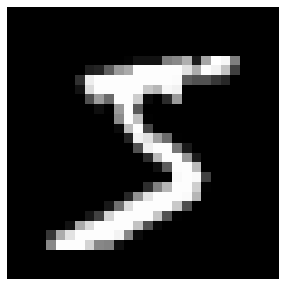

In [ ]:
#샘플 이미지 출력
import matplotlib.pyplot as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx], cmap='gray')
  plt.axis('off')
  plt.show()

plot_image(x_train, 0)

In [ ]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [ ]:
#정규화
x_train=x_train/255.0
x_valid=x_valid/255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [ ]:
print(x_train.shape, x_valid.shape)

#채널 추가
x_train_in=x_train[..., tf.newaxis]
x_valid_in=x_valid[..., tf.newaxis]
print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


### 2-2. Sequential API로 모델 생성 및 학습
- Sequential API를 사용하여 합성곱 레이어 1개, 풀링 레이어 1개를 적용하는 간단한 모델을 만든다. 
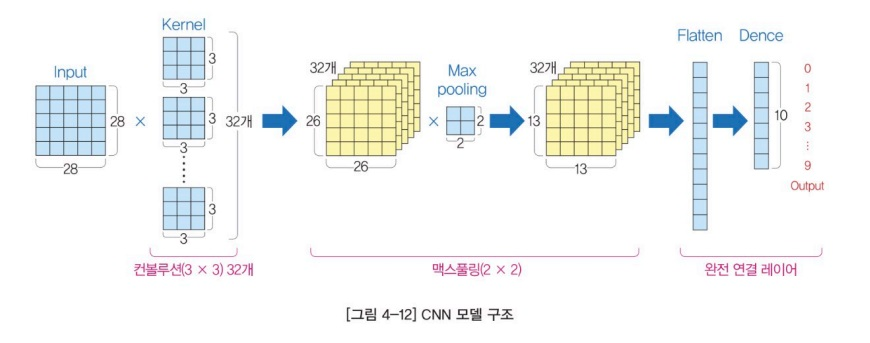
- 최종 분류기로 Dense 레이어를 적용하기 위해, Flatten 층을 추가하여 1차원 배열로 펼쳐준다.
- 합성곱은 **Conv2D** 레이어를 사용하고, (3, 3) 크기의 서로 다른 32가지 종류의 커널을 적용한다. ReLU 활성화 함수를 적용하고, name 속성에 레이어의 이름을 'conv'라고 지정한다.
- 풀링 레이어는 (2, 2) 크기로 최대 풀링을 적용하고, 레이어 이름 속성을 추가한다.
- 최종 분류기는 정답 레이블이 0~9까지 10개의 값을 가지므로 노드 개수를 10으로 하고, 분류 클래스가 10개인 다중 분류이므로 활성화 함수로 softmax를 적용한다.


In [ ]:
#Sequential API를 사용해 샘플 모델 생성
model=tf.keras.Sequential([
    #Convolution 적용(32 filters)
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',
                           input_shape=(28,28,1), name='conv'),
    #Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2,2), name='pool'),
    #Classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax'),
])

### 2-2. Sequential API로 모델 생성 및 학습
- 앞서 정의한 모델 구조에 옵티마이저, 손실함수, 평가지표를 설정해주고 컴파일하면 모델 인스턴스가 생성된다.
- `fit()` 메서드에 훈련 셋과 검증 셋을 주입하고, `epochs`를 10으로 지정한다.
- 코드를 실행하면 모델이 학습하면서 epoch당 손실과 평가 결과를 출력한다.
- `evaluate()` 메서드를 모델 인스턴스에 적용하면 모델의 학습된 가중치를 사용하여 손실과 평가지표를 계산한다. 검증 셋에 대하여 약 98%의 정확도를 나타낸다.
- 훈련 결과를 history 객체에 저장했으므로 10 epoch 동안 모델의 예측 오차와 정확도를 그래프로 그리는 함수를 정의하고 실행한다.
- 그래프에서 훈련 셋에 대한 손실은 계속 줄어드는 반면, 검증 셋의 손실은 어느 수준에서 더 이상 낮아지지 않는다. 4 epoch 이후부터는 모델이 과대적합으로 진행된 것을 파악할 수 있다.

In [ ]:
#모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#모델 훈련
history=model.fit(x_train, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2190 - accuracy: 0.9378 - val_loss: 0.0890 - val_accuracy: 0.9726
Epoch 2/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0795 - accuracy: 0.9773 - val_loss: 0.0700 - val_accuracy: 0.9777
Epoch 3/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0608 - accuracy: 0.9818 - val_loss: 0.0600 - val_accuracy: 0.9805
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0502 - accuracy: 0.9849 - val_loss: 0.0546 - val_accuracy: 0.9823
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0419 - accuracy: 0.9879 - val_loss: 0.0528 - val_accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0365 - accuracy: 0.9888 - val_loss: 0.0540 - val_accuracy: 0.9830
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0315 - accuracy: 0.9902 - val_loss: 0.0527 -

In [ ]:
#모델의 손실과 평가지표 계산
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 2s 8ms/step - loss: 0.0544 - accuracy: 0.9840


[0.05444984883069992, 0.984000027179718]

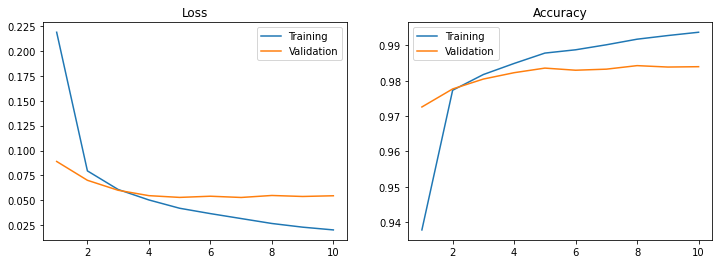

In [ ]:
#예측 오차와 정확도 시각화
def plot_loss_acc(history, epoch):
    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    
    fig, axes = plt.subplots(1,2,figsize=(12,4))
    
    axes[0].plot(range(1, epoch+1), loss, label = 'Training')
    axes[0].plot(range(1, epoch+1), val_loss, label = "Validation")
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch+1), acc, label = 'Training')
    axes[1].plot(range(1, epoch+1), val_acc, label = "Validation")
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')
    
    plt.show()
    
plot_loss_acc(history, 10)

### 2-3. 모델 구조 파악
- 모델 인스턴스에 `summary()` 메서드를 적용하면 모델의 구조를 요약해서 보여준다. 각 레이어의 이름과 출력 텐서의 형태, 그리고 각 레이어를 구성하는 파라미터(가중치) 개수를 알 수 있다.
- (28, 28, 1) 형태의 입력 텐서가 Conv2D를 거쳐 (26, 26, 32) 형태로 변환된다. 
 - (3, 3) 크기의 합성곱 필터를 사용하므로 이미지 가로, 세로 크기가 2씩 줄어든다.   
 - 서로 다른 32개의 필터를 적용했으므로 (26, 26) 크기의 특성맵이 32개 생성된다.
- 즉 (28, 28, 1) 이미지에 서로 다른 32개 커널을 적용해서 32가지 종류의 피처를 추출하는 것이다.
- (2, 2) 크기의 풀링 레이어를 적용했으므로 이미지 크기가 1/2로 줄어든다. 따라서 풀링 레이어를 거치면 (13, 13, 32) 텐서로 변환된다.
- Flatten 층에서 3차원 텐서를 1차원 텐서로 펼치면 5408개(=13x13x32) 원소를 갖는 1차원 벡터가 된다.
- 이 벡터를 출력 노드 10개인 Dense 레이어로 보내면 최종 분류 값을 예측해 출력한다.
- 생성된 모델 인스턴스의 **`input`** 속성으로부터 입력 레이어의 텐서를 추출할 수 있다. 입력 레이어는 (None, 28, 28, 1) 형태인데, 가장 앞에 있는 축(axis=0)의 None 값은 배치 크기가 들어오는 위치로 어떤 값의 배치 크기든 가능하다는 의미이다.
- 모델의 출력 텐서는 **`output`**` 속성으로 선택할 수 있다. 여기서는 10개의 노드를 갖는 1차원 벡터 형태이다.
- 모델을 구성하는 레이어들을 추출하기 위해 **`layers`** 속성을 이용하면 파이썬 리스트 형태로 레이어 객체를 담아서 보여준다.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [ ]:
#출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [ ]:
#레이어
model.layers

### 2-3. 모델 구조 파악
- 파이썬 리스트 인덱싱을 적용하여 첫번째 레이어를 선택할 수 있다.
- 각 레이어에 입력되는 텐서를 따로 선택하는 것도 가능하다. `input`과 `output`으로 입력과 출력 텐서를 확인할 수 있다.
- **`weights`** 속성을 사용하면 각 레이어의 가중치 행렬을 추출할 수 있다. 첫번째 변수는 'conv/kernel:0'이라는 이름과 같이 커널 행렬의 가중치를 나타내고, 두번째 변수는 'conv/bias:0'이라는 이름과 같이 각 커널의 상수항을 나타낸다.
- `kernel` 또는 `bias`를 사용하여 커널 행렬의 가중치 또는 상수항을 따로 선택할 수도 있다.

In [ ]:
#첫번째 레이어 선택
model.layers[0]

In [ ]:
#첫번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [ ]:
#첫번째 레이어 가중치 행렬
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 1.46082893e-01,  2.52199262e-01, -9.29960787e-01,
            4.85176891e-02, -1.27534121e-01,  1.76035855e-02,
           -3.94401163e-01, -2.13961467e-01,  1.20868862e-01,
           -5.86022794e-01, -1.24338949e+00, -6.38185620e-01,
           -7.08646834e-01,  5.90500161e-02,  1.96180001e-01,
           -3.23433727e-01,  3.43205214e-01,  6.89915046e-02,
           -3.57316166e-01, -1.41085744e+00, -5.71649492e-01,
            2.28401005e-01, -2.01799542e-01,  3.45592737e-01,
            2.97816008e-01,  7.95553148e-01,  2.16345891e-01,
           -3.93909067e-01,  2.84289181e-01, -1.24516511e+00,
            8.18782523e-02,  1.25640228e-01]],
 
         [[ 3.40021610e-01,  3.17127824e-01,  2.23451667e-02,
            6.81613445e-01, -7.03008354e-01,  3.13837409e-01,
            7.80230807e-03, -7.69666135e-01,  3.05668056e-01,
           -1.61418036e-01, -6.59976721e-01, -1.18080243e-01,
           

In [ ]:
#첫번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 1.46082893e-01,  2.52199262e-01, -9.29960787e-01,
           4.85176891e-02, -1.27534121e-01,  1.76035855e-02,
          -3.94401163e-01, -2.13961467e-01,  1.20868862e-01,
          -5.86022794e-01, -1.24338949e+00, -6.38185620e-01,
          -7.08646834e-01,  5.90500161e-02,  1.96180001e-01,
          -3.23433727e-01,  3.43205214e-01,  6.89915046e-02,
          -3.57316166e-01, -1.41085744e+00, -5.71649492e-01,
           2.28401005e-01, -2.01799542e-01,  3.45592737e-01,
           2.97816008e-01,  7.95553148e-01,  2.16345891e-01,
          -3.93909067e-01,  2.84289181e-01, -1.24516511e+00,
           8.18782523e-02,  1.25640228e-01]],

        [[ 3.40021610e-01,  3.17127824e-01,  2.23451667e-02,
           6.81613445e-01, -7.03008354e-01,  3.13837409e-01,
           7.80230807e-03, -7.69666135e-01,  3.05668056e-01,
          -1.61418036e-01, -6.59976721e-01, -1.18080243e-01,
           1.34155015e-02,  

In [ ]:
#첫번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.33568573, -0.2533479 , -0.14167176, -0.01818245, -0.09962615,
       -0.177047  , -0.35034737, -0.00820872, -0.22981253, -0.19843315,
        0.05727235, -0.16044044, -0.00925332, -0.18321563, -0.2747366 ,
       -0.23993352,  0.09412152, -0.3183271 , -0.00194432, -0.04730502,
       -0.08678036, -0.05892621, -0.3521679 , -0.12629122, -0.2769543 ,
        0.13653179, -0.2792529 , -0.01971468, -0.2934919 , -0.02135322,
       -0.18211411, -0.27421197], dtype=float32)>

### 2-3. 모델 구조 파악
- 모델에 **`get_layer`** 속성으로 레이어의 이름을 사용하여 해당 레이어를 선택할 수 있다.
- 모델에 입력 데이터를 넣어주고, 모델의 첫번째와 두번째 레이어의 출력을 최종 출력으로 갖는 activator 모델을 정의한다. 첫번째 샘플에 대하여 각 레이어의 출력을 예측한다.
- 2개의 출력 텐서 중에 첫번째 텐서는 Conv2D 레이어의 출력이다. (1, 26, 26, 32) 형태로 1은 입력 이미지의 개수를 나타낸다.
- 첫번째 레이어에서 출력되는 특성맵 이미지를 32개 커널로 구분하여 시각화하면 아래의 그림과 같다. 출력 이미지 특징이 조금씩 차이가 있는데, 이처럼 각 커널은 입력 이미지로부터 서로 다른 피처를 추출하는 역할을 한다.

In [ ]:
#name 속성 사용하여 레이어 선택
model.get_layer('conv')

In [ ]:
#샘플 이미지의 레이어별 출력을 리스트에 추가 (첫번째, 두번째 레이어)
activator=tf.keras.Model(inputs=model.input, outputs=[layer.output for layer in model.layers[:2]])
activations=activator.predict(x_train_in[0][tf.newaxis,...])
len(activations)

1/1 [==============================] - 0s 90ms/step


2

In [ ]:
#첫번째 레이어(conv) 출력층
conv_activation=activations[0]
conv_activation.shape

(1, 26, 26, 32)

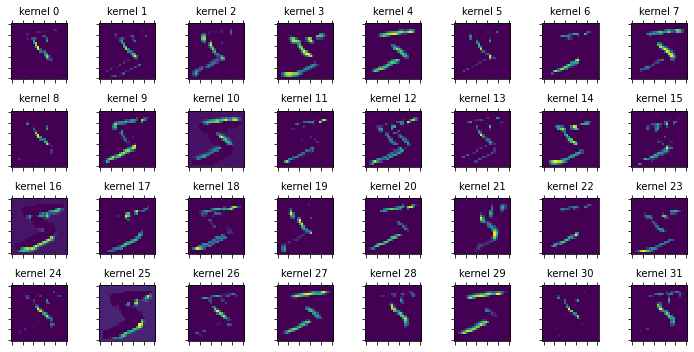

In [ ]:
#Convolution 시각화
fig, axes=plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
    axes[i//8, i%8].matshow(conv_activation[0,:,:,i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)
    
plt.tight_layout()
plt.show()

### 2-3. 모델 구조 파악
- 두번째 레이어는 최대 풀링 레이어로, 여기서 출력하는 텐서는 (1, 13, 13, 32) 형태를 갖는다.
- 각 커널별로 출력되는 특성맵 이미지를 시각화하면 앞의 Conv2D 출력 이미지에 비하여 화소 크기가 굵어진 것을 확인할 수 있다. 
- 최대 풀링은 인근 픽셀들을 모아서 최대값으로 고정하기 때문에 픽셀 수는 줄이면서 특징을 더욱 강하게 드러낼 수 있다.

In [ ]:
#두번째 레이어 출력층
pooling_activation=activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


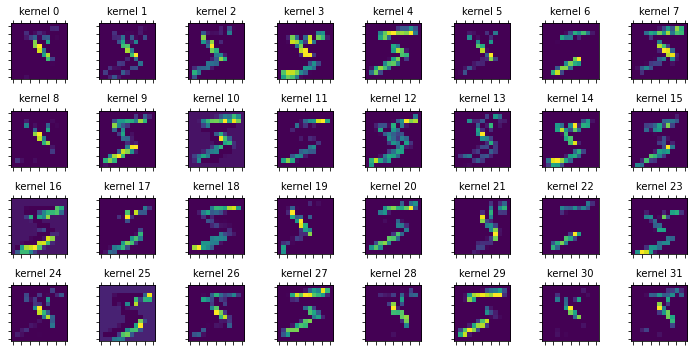

In [ ]:
#시각화
fig, axes=plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
    axes[i//8, i%8].matshow(pooling_activation[0,:,:,i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)
    
plt.tight_layout()
plt.show()

## 3. 복잡한 모델 생성
- 텐서플로 케라스의 Functional API를 사용하면 Sequential API로 구현할 수 없는 복잡한 구조의 모델을 정의할 수 있다.

### 3-1. 데이터셋 준비
- 원본 mnist 데이터셋은 0~9까지 숫자를 손글씨로 쓴 이미지(x)와 정답(y) 숫자로 구성되어 있다.
- 0~9까지 숫자를 맞추는 정답 외에 홀수인지 짝수인지 판단하는 정답(y_odd)를 새로 만들어서 추가한다. y_train 값이 홀수면 1, 짝수면 0으로 하는 y_train_odd 배열을 새로 만든다.
- y_train 배열과 홀짝으로 분류한 y_train_odd 배열을 동시에 출력해보면 홀수, 짝수 여부가 잘 정리되었다.
- 검증 셋에 대해서도 홀수, 짝수를 나타내는 y_valid_odd 배열을 만든다.
- 입력 이미지 데이터를 255로 나누어 정규화한다.
- 색상이 1개인 모노 컬러 이미지이므로 새로운 축을 추가하고 채널 개수를 1개로 지정한다. 텐서플로 **`expand_dims()`** 함수에 원본 배열을 입력하고 새롭게 추가하려는 축의 인덱스를 지정하면 해당 인덱스에 새로운 축이 추가된다.
- 여기서는 축의 인덱스로 -1을 지정하여 새로운 축이 끝에 추가된다. 즉 (60000, 28, 28) 배열이 (60000, 28, 28, 1) 배열이 된다.

In [ ]:
import tensorflow as tf
import numpy as np

#mnist 데이터 로드
mnist=tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid)=mnist.load_data()
print(x_train.shape, y_train.shape) 
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
#새로운 출력값 배열 생성(홀수:1, 짝수:0)
import pandas as pd
y_train_odd=[]
for y in y_train:
  if y%2==0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)

y_train_odd=np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [ ]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [ ]:
#validation 데이터셋 처리
y_valid_odd=[]
for y in y_valid:
  if y%2==0:
    y_valid_odd.append(0)
  else:
    y_valid_odd.append(1)

y_valid_odd=np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [ ]:
#정규화
x_train=x_train/255.0
x_valid=x_valid/255.0

In [ ]:
#채널 추가
x_train_in=tf.expand_dims(x_train, -1)
x_valid_in=tf.expand_dims(x_valid, -1)
print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### 3-2. Functional API로 다중 입력, 다중 출력 레이어 생성
- Functional API를 사용하면 다중 입력 또는 다중 출력 같은 복잡한 구조의 모델을 만들 수 있다. 
- 다음 코드에서 입력 레이어 inputs의 경우, Conv2D 레이어와 Flatten 레이어의 입력으로 사용된다. 따라서 입력 레이어는 2개의 출력을 갖게 된다.
- 서로 다른 2개의 출력은 각각 다른 레이어의 입력으로 사용되고, 최종적으로 Concatenate 레이어에서 합쳐진 다음에 Dense 레이어를 통과한다. 
- 앞서 정의한 모델 구조를 케라스의 **`utils`** 모듈의 **`plot_model`** 함수를 사용하여  그래프로 출력하면 다음과 같다.
- 입력 레이어가 2개의 출력으로 나누어지고, 마지막 Dense 레이어를 통과하기 전에 Concatenate 레이어에서 하나로 합쳐지는 구조를 시각적으로 확인할 수 있다.
- 다중 분류 모델에 맞게 손실함수와 평가지표를 지정하고, 옵티마이저로는 **adam**을 사용한다. 
- 10 epoch에 대한 모델 훈련을 마치고 검증 데이터에 대한 모델의 예측 성능을 평가한다.

In [ ]:
#Functional API를 이용하여 모델 생성
inputs=tf.keras.layers.Input(shape=(28,28,1))

conv=tf.keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
pool=tf.keras.layers.MaxPooling2D((2,2))(conv)
flat=tf.keras.layers.Flatten()(pool)

flat_inputs=tf.keras.layers.Flatten()(inputs)
concat=tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs=tf.keras.layers.Dense(10, activation='softmax')(concat)

model=tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 flatten_1 (Flatten)            (None, 5408)         0           ['max_pooling2d[0][0]']          
                                                                                            

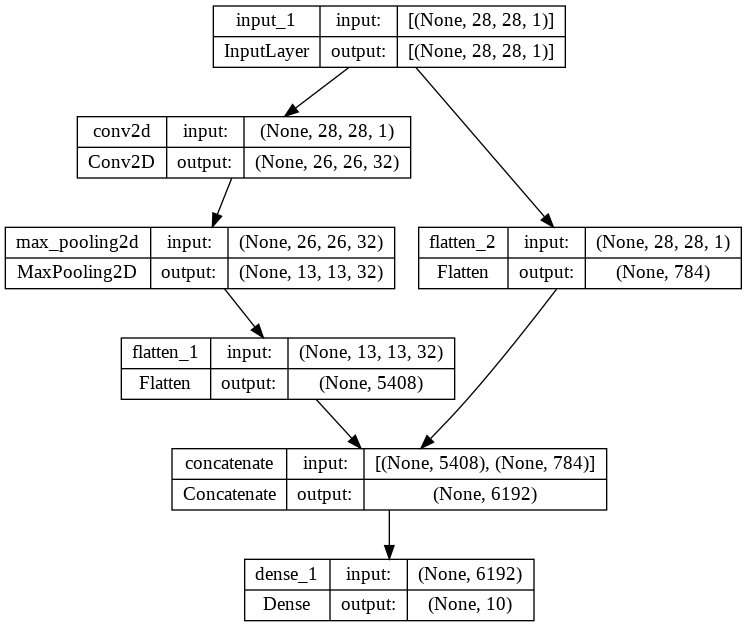

In [ ]:
#모델 구조 출력 및 이미지 파일로 저장
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

In [ ]:
#모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=model.fit(x_train_in, y_train, validation_data = (x_valid_in, y_valid), epochs=10)

# 모델 성능
val_loss, val_acc=model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2066 - accuracy: 0.9407 - val_loss: 0.0854 - val_accuracy: 0.9748
Epoch 2/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0795 - accuracy: 0.9767 - val_loss: 0.0698 - val_accuracy: 0.9766
Epoch 3/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0593 - accuracy: 0.9826 - val_loss: 0.0600 - val_accuracy: 0.9818
Epoch 4/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0494 - accuracy: 0.9851 - val_loss: 0.0544 - val_accuracy: 0.9837
Epoch 5/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0409 - accuracy: 0.9883 - val_loss: 0.0605 - val_accuracy: 0.9815
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0341 - accuracy: 0.9890 - val_loss: 0.0650 - val_accuracy: 0.9801
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0282 - accuracy: 0.9908 - val_loss: 0.0580 -

### 3-3. 다중 출력 분류 모델
- 서로 다른 2가지 분류 문제를 예측하는 다중 출력 모델을 만든다.
- 다음은 0~9까지 숫자를 맞추는 분류 문제와 홀수와 짝수를 맞추는 분류 무제를 동시에 풀어내는 모델을 정의하는 코드다.
- 각기 다른 문제에 맞도록 최종 분류기의 출력 레이어를 2개 만드는 것이 핵심이다.
- 모델의 입력 텐서와 출력 텐서를 화면에 표시하면 입력은 하나이고 출력이 10개인 텐서와 입력은 하나이고 출력이 1개인 텐서로 2개가 확인된다.

In [ ]:
#Functional API를 이용하여 모델 생성
inputs=tf.keras.layers.Input(shape=(28,28,1), name='inputs')

conv=tf.keras.layers.Conv2D(32, (3,3), activation='relu', name='conv2d_layer')(inputs)
pool=tf.keras.layers.MaxPooling2D((2,2), name='maxpool_layer')(conv)
flat=tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs=tf.keras.layers.Flatten()(inputs)
concat=tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs=tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)
odd_outputs=tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model=tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

In [ ]:
#모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


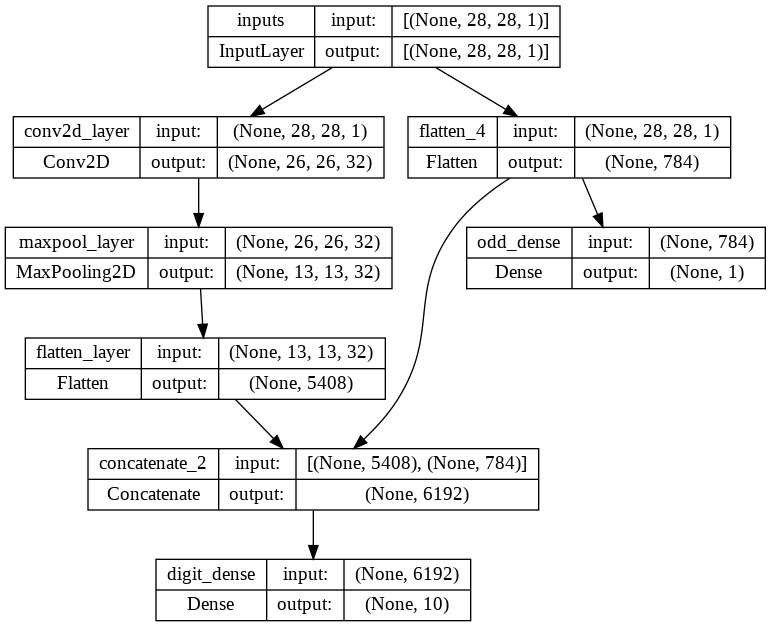

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

### 3-3. 다중 출력 분류 모델
- 모델을 컴파일할 때 주의할 내용은 앞서 모델을 정의할 때 각각의 출력 Dense 레이어에 name 속성으로 'digit_dense', 'odd_dense'와 같이 이름을 지정했다. 따라서 여기서 지정한 이름을 key로 하고, 해당 key에 해당하는 레이어에 적용할 손실함수와 가중치를 딕셔너리 형태로 지정한다.
- 모델을 훈련시키기 위해 `fit()` 메서드를 적용할 때도 출력 값을 2개 지정하고, 레이어 이름 속성을 key로 하는 딕셔너리 형태로 각각 출력에 맞는 정답 배열을 입력해야 한다.
- `evaluate()`로 모델 성능을 평가할 수 있다. 숫자를 맞추는 문제는 99%의 정확도를 보인 반면, 홀짝을 맞추는 문제는 약 90%의 정확도를 보인다.

In [ ]:
#모델 컴파일
model.compile(optimizer='adam', loss={'digit_dense':'sparse_categorical_crossentropy', 'odd_dense':'binary_crossentropy'},
                           loss_weights={'digit_dense':1, 'odd_dense':0.5},
                           #loss=1.0*sparse_categorical_crossentropy + 0.5*binary_crossentropy
                           metrics=['accuracy'])

In [ ]:
#모델 훈련
history = model.fit({'inputs':x_train_in},{'digit_dense':y_train, 'odd_dense':y_train_odd},
                                   validation_data = ({'inputs':x_valid_in}, {'digit_dense':y_valid,'odd_dense':y_valid_odd}), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.3660 - digit_dense_loss: 0.2043 - odd_dense_loss: 0.3234 - digit_dense_accuracy: 0.9407 - odd_dense_accuracy: 0.8649 - val_loss: 0.2313 - val_digit_dense_loss: 0.0927 - val_odd_dense_loss: 0.2771 - val_digit_dense_accuracy: 0.9731 - val_odd_dense_accuracy: 0.8901
Epoch 2/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2171 - digit_dense_loss: 0.0814 - odd_dense_loss: 0.2714 - digit_dense_accuracy: 0.9768 - odd_dense_accuracy: 0.8912 - val_loss: 0.1989 - val_digit_dense_loss: 0.0674 - val_odd_dense_loss: 0.2629 - val_digit_dense_accuracy: 0.9802 - val_odd_dense_accuracy: 0.8963
Epoch 3/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1929 - digit_dense_loss: 0.0614 - odd_dense_loss: 0.2630 - digit_dense_accuracy: 0.9822 - odd_dense_accuracy: 0.8960 - val_loss: 0.1948 - val_digit_dense_loss: 0.0654 - val_odd_dense_loss: 0.2587 - val_digit_dense_accuracy: 0.9786 -

In [ ]:
#모델 성능
model.evaluate({'inputs':x_train_in},{'digit_dense':y_train, 'odd_dense':y_train_odd})

1875/1875 [==============================] - 17s 9ms/step - loss: 0.1410 - digit_dense_loss: 0.0154 - odd_dense_loss: 0.2513 - digit_dense_accuracy: 0.9952 - odd_dense_accuracy: 0.9021


[0.14104604721069336,
 0.01538088358938694,
 0.25133004784584045,
 0.995199978351593,
 0.9020500183105469]

### 3-3. 다중 출력 분류 모델
- 검증 데이터셋의 인덱스 0에 해당하는 이미지를 출력하면 숫자 7에 대한 손글씨 이미지이다.
- 검증 데이터셋의 모든 이미지 데이터를 입력해서 2개의 분류 문제에 대한 예측 확률을 구하면 다음과 같다.
- 첫번재 예측 값은 10개 분류 레이블에 대한 확률을 담고 있고, 두번째 예측 값은 홀수일 확률을 담고 있다.
- 넘파이의 `argmax` 함수를 이용하여 예측 확률을 실제 정답 레이블로 변환한다. 검증 데이터셋의 첫 10개 이미지에 대한 예측 레이블은 다음과 같고, 첫번째 이미지를 7로 예측한다.
- 홀수, 짝수 여부에 대한 예측 레이블을 출력하면 다음과 같다. 임계값을 0.5로 지정하여 홀수일 확률이 0.5보다 크면 홀수로 분류한다. 첫번째 이미지 7에 대하여 홀수로 잘 분류하며, 두번째 이미지 2에 대하여 짝수로 정확하게 분류하고 있다.

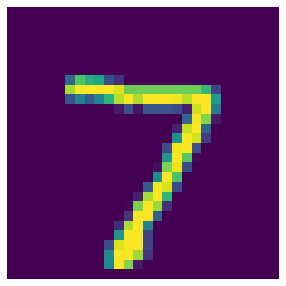

In [ ]:
#샘플 이미지 출력
import matplotlib.pyplot as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx])
  plt.axis('off')
  plt.show()

plot_image(x_valid, 0)

In [ ]:
#예측
digit_preds, odd_preds=model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 3s 8ms/step
[2.8409558e-13 5.4719332e-12 5.6265635e-11 2.3807813e-07 4.2774231e-13
 1.1597688e-13 8.3919598e-21 9.9999970e-01 2.2460218e-10 8.2231472e-10]
[0.9996078]


In [ ]:
digit_labels=np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [ ]:
odd_labels=(odd_preds >0.5).astype(np.int).reshape(1, -1)[0]
odd_labels[0:10]

<ipython-input-44-52188e4646bf>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  odd_labels=(odd_preds >0.5).astype(np.int).reshape(1, -1)[0]


array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

### 3-4. 전이학습
- 앞서 훈련한 모델의 일부를 가져와서 그대로 사용하고, 최종 출력층만 새롭게 추가하여 모델을 재구성할 수 있다. 이처럼 **기존의 학습된 모델을 활용하여 새로운 모델을 만들어내는 개념**을 **전이 학습**이라고 한다.

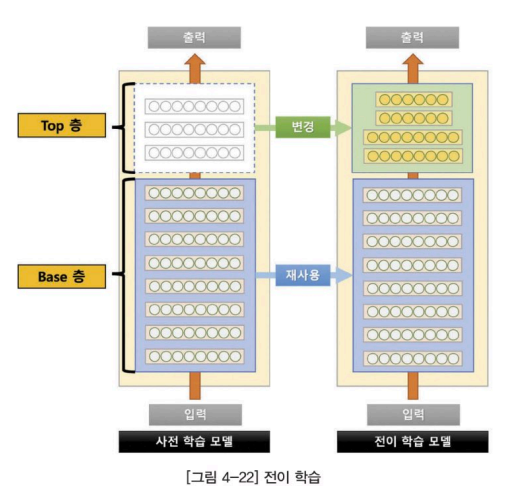

- 먼저 앞에서 학습한 모델에서 입력 레이어부터 'flatten_layer'라는 name 속성을 갖는 Flatten 층까지 해당하는 부분을 따로 추출하여 base_model 객체를 만든다. 이 모델은 (28, 28, 1) 이미지를 받아서 5408개의 피처로 특징을 추출해 출력하는 모델이다.
- Sequential API를 사용하여 앞에서 정의한 base_model을 레이어로 추가하고, 최종 분류기 역할을 하는 Dense 레이어를 새롭게 이어서 추가한다.
- `summary()`로 확인해보면 총 파라미터 개수는 54410개이고, 모두 훈련이 가능하다고 표시되어 있다. 훈련이 가능하다는 뜻은 모델 훈련시 파라미터 값이 업데이트된다는 것이다.
- 모델 구조를 출력해보면 최종적으로 노드 10개를 가진 분류기 역할을 하는 Dense 레이어가 추가된 것을 볼 수 있다.
- 모델을 컴파일하고 훈련하면 약 98.3%의 정확도를 보인다.

In [ ]:
#앞의 모델에서 flatten_layer 출력을 추출
base_model_output=model.get_layer('flatten_layer').output 

#앞의 출력을 출력으로 하는 모델 정의
base_model=tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


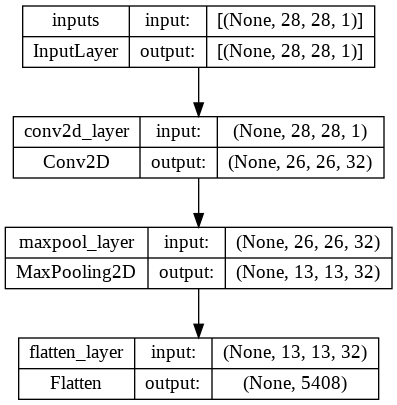

In [ ]:
#모델 구조 시각화
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [ ]:
#Sequential API 적용
digit_model=tf.keras.Sequential([
    base_model, #base_model를 레이어로 추가
    tf.keras.layers.Dense(10, activation='softmax'), #최종 분류기 Dense 레이어 추가
])

digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


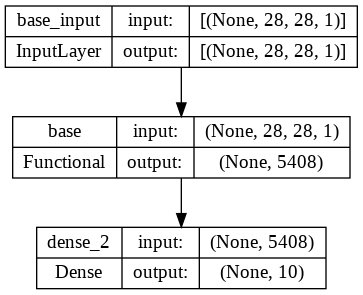

In [ ]:
plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

In [ ]:
#모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=digit_model.fit(x_train_in, y_train, validation_data = (x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1321 - accuracy: 0.9624 - val_loss: 0.0656 - val_accuracy: 0.9798
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0579 - accuracy: 0.9826 - val_loss: 0.0685 - val_accuracy: 0.9783
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0442 - accuracy: 0.9865 - val_loss: 0.0577 - val_accuracy: 0.9822
Epoch 4/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0357 - accuracy: 0.9886 - val_loss: 0.0550 - val_accuracy: 0.9820
Epoch 5/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0289 - accuracy: 0.9909 - val_loss: 0.0524 - val_accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0235 - accuracy: 0.9927 - val_loss: 0.0550 - val_accuracy: 0.9836
Epoch 7/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0194 - accuracy: 0.9939 - val_loss: 0.0569 -

### 3-4. 전이학습
- 모델 인스턴스는 **`trainable`** 속성을 가지고 있다. 이 속성을 False로 지정하면 모델의 파라미터 값이 고정되어 훈련을 통해 업데이트 되지 않는다. 이런 방식으로 base_model_frozen을 구성하면 `summary()`로 봤을 때 훈련 가능한 파라미터 개수가 0으로 확인된다.
- 이렇게 파라미터를 고정한 base_model_input 모델과 새로운 분류기 역할을 하는 Dense 레이어를 Functional API를 적용하여 구성한다.
- 총 파라미터 개수는 54410개이고 앞서 고정한 320개는 훈련이 불가능하다. 훈련 가능한 파라미터는 Flatten 레이어의 출력 5408개와 Dense 레이어의 10개 노드 사이의 가중치만 해당된다. 
- 즉 Flatten 레이어 이전에 존재하는 Conv2D 레이어의 파라미터 320개는 포함되지 않게 된다는 뜻이다.
- 모델을 컴파일하고 훈련한다.

In [ ]:
#베이스 모델의 가중치 고정 (Freeze model)
base_model_frozen=tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable=False 
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [ ]:
#Functional API 적용
dense_output=tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen=tf.keras.models.Model(inputs = base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [ ]:
#모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#모델 훈련
history=digit_model_frozen.fit(x_train_in, y_train, validation_data = (x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1171 - accuracy: 0.9684 - val_loss: 0.0589 - val_accuracy: 0.9816
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0482 - accuracy: 0.9855 - val_loss: 0.0571 - val_accuracy: 0.9825
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0363 - accuracy: 0.9895 - val_loss: 0.0539 - val_accuracy: 0.9823
Epoch 4/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0279 - accuracy: 0.9917 - val_loss: 0.0566 - val_accuracy: 0.9828
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0220 - accuracy: 0.9936 - val_loss: 0.0543 - val_accuracy: 0.9826
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0186 - accuracy: 0.9945 - val_loss: 0.0505 - val_accuracy: 0.9839
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0151 - accuracy: 0.9954 - val_loss: 0.0629 - val

### 3-4. 전이학습
- 모델 전체가 아니라 특정 레이어를 지정하여 파라미터가 업데이트되지 않도록 고정하는 방법도 가능하다. 
- 다음은 Conv2D 레이어를 취소하고 trainable 속성을 False로 지정하는 코드이다. `get_layer`로 원하는 레이어의 name 속성을 추출하여 `trainable=False`로 지정한다.
- 앞서 고정한 모델에 새로운 분류기 역할을 하는 Dense 레이어를 연결하여 모델을 구성한다.
- 모델을 컴파일하고 훈련시킨다.

In [ ]:
#베이스모델의 Conv2D레이어의 가중치만 고정(Freeze Layer)
base_model_frozen2 = tf.keras.models.Model(inputs = model.input,
                                           outputs=base_model.output, name='base_frozen')

base_model_frozen2.get_layer('conv2d_layer').trainable=False
base_model_frozen2.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [ ]:
#Functional API 적용
dense_output2=tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2=tf.keras.models.Model(inputs = base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [ ]:
#모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#모델 훈련
history=digit_model_frozen2.fit(x_train_in, y_train, validation_data = (x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1175 - accuracy: 0.9677 - val_loss: 0.0628 - val_accuracy: 0.9802
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0488 - accuracy: 0.9857 - val_loss: 0.0535 - val_accuracy: 0.9824
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0364 - accuracy: 0.9886 - val_loss: 0.0557 - val_accuracy: 0.9828
Epoch 4/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0287 - accuracy: 0.9912 - val_loss: 0.0498 - val_accuracy: 0.9837
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0219 - accuracy: 0.9932 - val_loss: 0.0535 - val_accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0179 - accuracy: 0.9947 - val_loss: 0.0604 - val_accuracy: 0.9822
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0156 - accuracy: 0.9953 - val_loss: 0.0572 - val_a